In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.options.display.max_rows = 999

In [3]:
public = pd.read_csv("data/PublicSector_Indicators.csv", delimiter=';', dtype={'Year': 'int16'}).dropna()
edu = pd.read_csv("data/EducationAndEnviron_Data.csv", delimiter=';', dtype={'Year': 'int16'}).dropna()

In [4]:
public

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
20,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Brazil,BRA,1970,1.641000e+02
22,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,India,IND,1970,9.630000e+01
24,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,South Africa,ZAF,1970,5.680000e+01
25,"Air transport, passengers carried",IS.AIR.PSGR,Brazil,BRA,1970,3.339800e+06
27,"Air transport, passengers carried",IS.AIR.PSGR,India,IND,1970,2.671600e+06
...,...,...,...,...,...,...
81490,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,Brazil,BRA,2019,6.728900e+01
81491,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,China,CHN,2019,5.325200e+01
81492,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,India,IND,2019,2.371500e+01
81493,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,Russian Federation,RUS,2019,9.321000e+01


In [5]:
edu

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
24,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,South Africa,ZAF,1970,67.669150
29,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,South Africa,ZAF,1970,68.242070
34,"Adjusted net enrollment rate, primary, male (%...",SE.PRM.TENR.MA,South Africa,ZAF,1970,67.096420
55,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970,23.378048
56,Agricultural land (% of land area),AG.LND.AGRI.ZS,China,CHN,1970,39.900940
...,...,...,...,...,...,...
71480,Urban population growth (annual %),SP.URB.GROW,Brazil,BRA,2019,1.045678
71481,Urban population growth (annual %),SP.URB.GROW,China,CHN,2019,2.292727
71482,Urban population growth (annual %),SP.URB.GROW,India,IND,2019,2.305597
71483,Urban population growth (annual %),SP.URB.GROW,Russian Federation,RUS,2019,0.134449


In [6]:
# 5 países analisados em 50 anos. máximo de linhas por métrica: 250

In [7]:
# análise dos dados
public.query("CountryCode == 'BRA'").SeriesName.value_counts()[:40]

Refugee population by country or territory of asylum                  50
Military expenditure (current LCU)                                    50
Arms imports (SIPRI trend indicator values)                           50
Military expenditure (% of GDP)                                       50
Military expenditure (current USD)                                    50
Air transport, freight (million ton-km)                               49
Air transport, passengers carried                                     49
Air transport, registered carrier departures worldwide                49
Fixed telephone subscriptions                                         46
Fixed telephone subscriptions (per 100 people)                        46
Mobile cellular subscriptions (per 100 people)                        45
Mobile cellular subscriptions                                         45
Arms exports (SIPRI trend indicator values)                           43
Unemployment, total (% of total labor force) (natio

In [8]:
# análise dos dados
edu.query("CountryCode == 'BRA'")

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
55,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970,2.337805e+01
60,Agricultural land (sq. km),AG.LND.AGRI.K2,Brazil,BRA,1970,1.953970e+06
65,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,Brazil,BRA,1970,1.658700e+05
70,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,Brazil,BRA,1970,4.739143e+01
75,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,Brazil,BRA,1970,6.085901e+01
...,...,...,...,...,...,...
71155,Rural population growth (annual %),SP.RUR.TOTL.ZG,Brazil,BRA,2019,-1.165298e+00
71285,"Secondary education, duration (years)",SE.SEC.DURS,Brazil,BRA,2019,7.000000e+00
71470,Urban population,SP.URB.TOTL,Brazil,BRA,2019,1.832416e+08
71475,Urban population (% of total population),SP.URB.TOTL.IN.ZS,Brazil,BRA,2019,8.682400e+01


In [9]:
# análise
edu.query("CountryCode == 'BRA'").SeriesName.value_counts().filter(regex='Electricity')

Electricity production from renewable sources, excluding hydroelectric (% of total)    45
Electricity production from natural gas sources (% of total)                           45
Electricity production from coal sources (% of total)                                  45
Electricity production from oil, gas and coal sources (% of total)                     45
Electricity production from oil sources (% of total)                                   45
Electricity production from renewable sources, excluding hydroelectric (kWh)           45
Electricity production from hydroelectric sources (% of total)                         45
Electricity production from nuclear sources (% of total)                               44
Name: SeriesName, dtype: int64

In [10]:
#análise
edu.query("CountryCode == 'BRA'").SeriesName.value_counts()

Rural population growth (annual %)                                                                                                   50
Urban population (% of total population)                                                                                             50
Urban population growth (annual %)                                                                                                   50
Population in urban agglomerations of more than 1 million (% of total population)                                                    50
Rural population                                                                                                                     50
Lower secondary school starting age (years)                                                                                          50
Population in largest city                                                                                                           50
Secondary education, duration (years)           

In [11]:
# possui só 6 pontos
edu.query("CountryCode == 'BRA'")[(edu.SeriesName == "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)")]

<ipython-input-11-2c7a1fc5d5eb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edu.query("CountryCode == 'BRA'")[(edu.SeriesName == "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)")]


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
345,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,1970,1.97546
8925,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,1976,4.30000
14645,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,1980,4.97579
66125,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,2016,15.34518
67555,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,2017,15.73458
68985,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.ZS,Brazil,BRA,2018,16.54339


In [12]:
# unindo os dois dataframes, pegando só valores pro Brasil
merge = edu.merge(public, how='outer').query("CountryCode == 'BRA'")

In [13]:
merge

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
3,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970,2.337805e+01
7,Agricultural land (sq. km),AG.LND.AGRI.K2,Brazil,BRA,1970,1.953970e+06
11,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,Brazil,BRA,1970,1.658700e+05
15,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,Brazil,BRA,1970,4.739143e+01
19,Agricultural methane emissions (% of total),EN.ATM.METH.AG.ZS,Brazil,BRA,1970,6.085901e+01
...,...,...,...,...,...,...
56673,"Vulnerable employment, male (% of male employm...",SL.EMP.VULN.MA.ZS,Brazil,BRA,2019,3.101000e+01
56678,"Vulnerable employment, total (% of total emplo...",SL.EMP.VULN.ZS,Brazil,BRA,2019,2.790800e+01
56683,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,Brazil,BRA,2019,7.300500e+01
56688,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,Brazil,BRA,2019,6.305300e+01


In [14]:
mask = merge.SeriesName.value_counts() > 45
mask

Urban population growth (annual %)                                                                                                    True
Population in urban agglomerations of more than 1 million                                                                             True
Military expenditure (% of GDP)                                                                                                       True
Primary education, duration (years)                                                                                                   True
Lower secondary school starting age (years)                                                                                           True
Rural population (% of total population)                                                                                              True
Population in the largest city (% of urban population)                                                                                True
Urban population (% of tota

In [15]:
mask[mask]

Urban population growth (annual %)                                                   True
Population in urban agglomerations of more than 1 million                            True
Military expenditure (% of GDP)                                                      True
Primary education, duration (years)                                                  True
Lower secondary school starting age (years)                                          True
Rural population (% of total population)                                             True
Population in the largest city (% of urban population)                               True
Urban population (% of total population)                                             True
Population in urban agglomerations of more than 1 million (% of total population)    True
Population in largest city                                                           True
Arms imports (SIPRI trend indicator values)                                          True
Urban popu

In [16]:
columns = mask[mask].index.tolist()
columns

['Urban population growth (annual %)',
 'Population in urban agglomerations of more than 1 million',
 'Military expenditure (% of GDP)',
 'Primary education, duration (years)',
 'Lower secondary school starting age (years)',
 'Rural population (% of total population)',
 'Population in the largest city (% of urban population)',
 'Urban population (% of total population)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Population in largest city',
 'Arms imports (SIPRI trend indicator values)',
 'Urban population',
 'Rural population growth (annual %)',
 'Military expenditure (current LCU)',
 'Rural population',
 'Military expenditure (current USD)',
 'Primary school starting age (years)',
 'Secondary education, duration (years)',
 'Refugee population by country or territory of asylum',
 'Population density (people per sq. km of land area)',
 'Forest rents (% of GDP)',
 'Total natural resources rents (% of GDP)',
 'Natural gas rents (% of GDP)',
 

In [17]:
data = (
    merge
    .pivot(index='Year', columns='SeriesName', values='Value')
    [columns]
    .dropna()
)
data

SeriesName,Urban population growth (annual %),Population in urban agglomerations of more than 1 million,Military expenditure (% of GDP),"Primary education, duration (years)",Lower secondary school starting age (years),Rural population (% of total population),Population in the largest city (% of urban population),Urban population (% of total population),Population in urban agglomerations of more than 1 million (% of total population),Population in largest city,...,Agricultural land (% of land area),Aquaculture production (metric tons),CO2 emissions (metric tons per capita),Livestock production index (2004-2006 = 100),CO2 emissions (kt),Arable land (hectares),Food production index (2004-2006 = 100),CO2 emissions from liquid fuel consumption (kt),Fixed telephone subscriptions (per 100 people),Fixed telephone subscriptions
Year,,,,,,,,,,,,,,,,,,,,,
1975,3.965759,32986816.0,1.972144,4.0,11.0,39.211,14.750930,60.789,30.766633,9614016.0,...,25.533911,286.0,1.409906,23.46,151164.741,4.200000e+07,28.07,129811.800,2.053087,2201242.0
1976,3.933474,34491112.0,2.002753,4.0,11.0,38.255,14.847688,61.745,31.415263,10065309.0,...,25.843908,433.0,1.413181,25.41,155154.437,4.300000e+07,30.95,132316.361,2.286163,2510000.0
1977,3.888481,36068791.0,1.687726,4.0,11.0,37.311,14.949919,62.689,32.082424,10536457.0,...,26.148162,780.0,1.449508,25.66,162961.480,4.400000e+07,32.33,135403.975,2.721805,3060000.0
1978,3.851575,37730700.0,1.599672,4.0,11.0,36.375,15.059362,63.625,32.774776,11030355.0,...,26.326312,1132.0,1.536863,27.01,176925.416,4.400000e+07,31.58,145590.901,3.231378,3720000.0
1979,3.811773,39479499.0,1.521932,4.0,11.0,35.449,15.175645,64.551,33.491713,11547405.0,...,26.622311,1687.0,1.597599,28.68,188322.452,4.490000e+07,33.06,154655.725,3.639405,4290073.0
1980,3.771068,41322855.0,1.138434,4.0,11.0,34.532,15.300017,65.468,34.237702,12089454.0,...,26.833482,3737.0,1.550121,31.90,187090.340,4.500000e+07,37.41,150335.999,4.101281,4950000.0
1981,3.723562,42524411.0,1.143149,4.0,11.0,33.630,15.099354,66.370,34.413125,12383528.0,...,27.018451,5794.0,1.390352,32.92,171806.284,4.560000e+07,38.19,135638.663,4.313333,5330000.0
1982,3.676883,43616135.0,1.303534,4.0,11.0,32.738,14.842702,67.262,34.479618,12628957.0,...,27.295068,7586.0,1.361098,33.30,172176.651,4.700000e+07,40.16,133302.784,4.602747,5822397.0
1983,3.605492,44742317.0,1.254580,4.0,11.0,31.858,14.600832,68.142,34.563712,12879250.0,...,27.377024,9168.0,1.287243,34.36,166632.147,4.700000e+07,40.11,125840.439,4.866788,6300000.0


In [18]:
co2_corr = data.corr().loc['CO2 emissions (kt)']
co2_corr

SeriesName
Urban population growth (annual %)                                                  -0.937913
Population in urban agglomerations of more than 1 million                            0.954316
Military expenditure (% of GDP)                                                     -0.267994
Primary education, duration (years)                                                  0.633785
Lower secondary school starting age (years)                                               NaN
Rural population (% of total population)                                            -0.904385
Population in the largest city (% of urban population)                              -0.851607
Urban population (% of total population)                                             0.904385
Population in urban agglomerations of more than 1 million (% of total population)    0.929699
Population in largest city                                                           0.946672
Arms imports (SIPRI trend indicator values)      

In [19]:
metricas = co2_corr[(abs(co2_corr) > .4) & (co2_corr != 1)].index.to_series().reset_index(drop=True)
metricas

0                    Urban population growth (annual %)
1     Population in urban agglomerations of more tha...
2                   Primary education, duration (years)
3              Rural population (% of total population)
4     Population in the largest city (% of urban pop...
5              Urban population (% of total population)
6     Population in urban agglomerations of more tha...
7                            Population in largest city
8                                      Urban population
9                    Military expenditure (current LCU)
10                                     Rural population
11                   Military expenditure (current USD)
12                  Primary school starting age (years)
13    Refugee population by country or territory of ...
14    Population density (people per sq. km of land ...
15                              Forest rents (% of GDP)
16             Total natural resources rents (% of GDP)
17                         Natural gas rents (% 

In [20]:
remove=[3, 5, 8, 12, 13, 14, 20, 24, 28, 42]

In [21]:
X_columns = [x for idx, x in enumerate(metricas) if idx in remove]

In [22]:
X_columns

['Rural population (% of total population)',
 'Urban population (% of total population)',
 'Urban population',
 'Primary school starting age (years)',
 'Refugee population by country or territory of asylum',
 'Population density (people per sq. km of land area)',
 'Mineral rents (% of GDP)',
 'Cereal yield (kg per hectare)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'Fixed telephone subscriptions (per 100 people)']

In [23]:
X = data[X_columns]
X

SeriesName,Rural population (% of total population),Urban population (% of total population),Urban population,Primary school starting age (years),Refugee population by country or territory of asylum,Population density (people per sq. km of land area),Mineral rents (% of GDP),Cereal yield (kg per hectare),CO2 emissions from gaseous fuel consumption (% of total),Fixed telephone subscriptions (per 100 people)
Year,,,,,,,,,,
1975,39.211,60.789,65175659.0,7.0,32000.0,12.827759,0.677337,1358.8,0.516702,2.053087
1976,38.255,61.745,67790415.0,7.0,30000.0,13.135810,0.869484,1444.6,0.590863,2.286163
1977,37.311,62.689,70478354.0,7.0,36000.0,13.451006,0.619921,1452.5,0.695320,2.721805
1978,36.375,63.625,73245834.0,7.0,35000.0,13.773537,0.492684,1210.1,0.839413,3.231378
1979,35.449,64.551,76091693.0,7.0,25000.0,14.103426,0.557990,1301.3,0.866501,3.639405
1980,34.532,65.468,79015954.0,7.0,24000.0,14.440295,0.714607,1575.7,1.007448,4.101281
1981,33.630,66.370,82013626.0,7.0,24000.0,14.784429,0.633340,1611.1,0.981815,4.313333
1982,32.738,67.262,85085296.0,7.0,5400.0,15.134745,0.655232,1544.8,1.384363,4.602747
1983,31.858,68.142,88209014.0,7.0,5400.0,15.487754,0.912540,1614.6,2.029005,4.866788


In [24]:
y = data['CO2 emissions (kt)']
y

Year
1975    151164.741
1976    155154.437
1977    162961.480
1978    176925.416
1979    188322.452
1980    187090.340
1981    171806.284
1982    172176.651
1983    166632.147
1984    168806.678
1985    181248.809
1986    198883.412
1987    207530.198
1988    209363.698
1989    214024.455
1990    208886.988
1991    219330.604
1992    220705.729
1993    230738.641
1994    242154.012
1995    258347.484
1996    284782.887
1997    300547.320
1998    312289.054
1999    320173.104
2000    327983.814
2001    337433.673
2002    332266.870
2003    321621.569
2004    337826.042
2005    347308.904
2006    347668.270
2007    363212.683
2008    387631.236
2009    367147.374
2010    419754.156
2011    439412.943
2012    470028.726
2013    503677.118
2014    533530.165
2015    504388.516
2016    462298.690
Name: CO2 emissions (kt), dtype: float64

In [69]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt

In [26]:
X_scaler = MinMaxScaler()
X_norm = X_scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33)

In [28]:
# Reg. Linear
reg = LinearRegression()
reg.fit(X_train, y_train)
r2_score(y_test.values, reg.predict(X_test))

0.9577542756839384

In [29]:
# Descida do Grad.
reg_grad = SGDRegressor(max_iter=100000, alpha=0)
reg_grad.fit(X_train, y_train)
r2_score(y_test.values, reg_grad.predict(X_test))

0.9480813916747967

In [30]:
# KNN
neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train)
r2_score(y_test.values, neigh.predict(X_test))


for i in range(2, 6):
    neigh = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    neigh.fit(X_train, y_train)

    print(f"R2 para {i} vizinhos: {r2_score(y_test.values, neigh.predict(X_test))}\n")

R2 para 2 vizinhos: 0.9543757933602404

R2 para 3 vizinhos: 0.9545388074629225

R2 para 4 vizinhos: 0.9703953928321689

R2 para 5 vizinhos: 0.9624352862158031



In [31]:
for i in range(1, 11):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X_norm)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.33, random_state=42)

    regression = LinearRegression().fit(X_train, y_train)
    print(f"Partição de Treino (grau {i}): {r2_score(y_train, regression.predict(X_train))}")

    print(f"Partição de Teste (grau {i}): {r2_score(y_test, regression.predict(X_test))}\n")

Partição de Treino (grau 1): 0.9873269950223261
Partição de Teste (grau 1): 0.9409711401074652

Partição de Treino (grau 2): 1.0
Partição de Teste (grau 2): 0.8223575275494858

Partição de Treino (grau 3): 1.0
Partição de Teste (grau 3): 0.9065145805466718

Partição de Treino (grau 4): 1.0
Partição de Teste (grau 4): 0.9198491718543472

Partição de Treino (grau 5): 1.0
Partição de Teste (grau 5): 0.9274406395488122

Partição de Treino (grau 6): 1.0
Partição de Teste (grau 6): 0.9309694688702673

Partição de Treino (grau 7): 1.0
Partição de Teste (grau 7): 0.9291178718915653

Partição de Treino (grau 8): 1.0
Partição de Teste (grau 8): 0.9202908336577524

Partição de Treino (grau 9): 1.0
Partição de Teste (grau 9): 0.9032882088912897

Partição de Treino (grau 10): 1.0
Partição de Teste (grau 10): 0.8774857693571829



In [83]:
# Linear Univariável

X_2 = data['Rural population']
y_2 = data['CO2 emissions (kt)']

In [84]:
X_2_train, X_2_test, y_2_train, Y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=42)

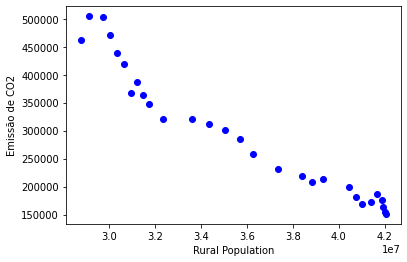

In [85]:
plt.scatter(X_2_train, y_2_train, color='blue')
plt.xlabel("Rural Population")
plt.ylabel("Emissão de CO2")
plt.show()



In [86]:
# CRIAR UM MODELO DE TIPO DE REGRESSÃO LINEAR
modelo =  linear_model.LinearRegression()

# TREINAR O MODELO USANDO O DATASET DE TESTE
# PARA ENCONTRAR O VALOR DE A E B (Y = A + B.X)
modelo.fit(X_2_train.values.reshape(-1,1), y_2_train.values.reshape(-1,1))



LinearRegression()

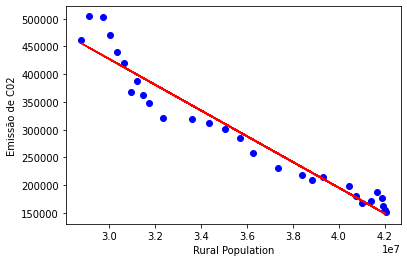

In [87]:
plt.scatter(X_2_train, y_2_train, color='blue')
plt.plot(X_2_train, modelo.coef_[0][0]*X_2_train + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Rural Population")
plt.show()



In [88]:


#Primeiro a gente tem que fazer as predições usando o modelo e base de teste
predicoesCo2 = modelo.predict(X_2_test.values.reshape(-1,1))



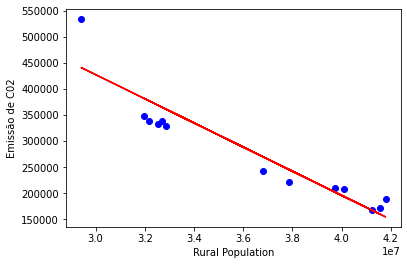

In [89]:
plt.scatter(X_2_test, Y_2_test, color='blue')
plt.plot(X_2_test, modelo.coef_[0][0]*X_2_test + modelo.intercept_[0], '-r')
plt.ylabel("Emissão de C02")
plt.xlabel("Rural Population")
plt.show()

In [90]:
#Agora é mostrar as métricas
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_2_test, predicoesCo2))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_2_test, predicoesCo2))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(Y_2_test, predicoesCo2)))
print("R2-score: %.2f" % r2_score(predicoesCo2 , Y_2_test))

Erro Quadrático Médio (MSE): 1339069216.30
Erro Médio Absoluto (MAE): 29490.44
Raiz do Erro Quadrático Médio (RMSE): 36593.29 
R2-score: 0.86
